# Romania elections

Let's color the Romanian counties plus the capital proportional to the number of people that have voted. 

Geo-data on administrative organisation of Romania: from http://www.diva-gis.org/datadown (choose `Romania`, then `Administrative Areas`). 

Election data: https://prezenta.roaep.ro/parlamentare06122020/romania-counties

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [38]:
INPUT_FOLDER_NAME = "/Users/abuzatu/Work/data/geo_spatial/Romania"
CRS_INIT = {"init": "epsg:4326"} # longitude - latitude coordinate system
ELECTION_RESULTS_FILE_NAME = f"{INPUT_FOLDER_NAME}/7/results_elections_dec_2020.pickle"

In [3]:
def plot_counties_map(gdf_counties):
    fig, ax = plt.subplots(1, 1, figsize = (10, 6))
    # plot counties
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
    gdf_counties.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                 )
    # add capital in other color
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("red", alpha=1.0)
    gdf_capital.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                 )
    #
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.title(f"Romania: {len(gdf_counties)-1} counties + the capital city", fontsize = 18)

In [4]:
def plot_counties_colored_by_value(gdf, var):
    dynamic_cmap = "hot"
    dynamic_linewidth = 0.4
    vmin = np.min(gdf[var].values)
    vmax = np.max(gdf[var].values)
    print(f"vmin={vmin}, vmax={vmax}")
    fig, ax = plt.subplots(1, 1, figsize = (10, 6))   
    #
    polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("blue", alpha=1.0)
    gdf.plot(ax = ax, 
                  facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                 )
    #
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    plt.title(f"Romania by {var}", fontsize = 18)
    #
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gdf.to_crs(CRS_INIT).plot(
        ax=ax,
        column=var,
        cmap=dynamic_cmap,
        legend=True,
        cax=cax,
        vmin=vmin,
        vmax=vmax,
        linewidth=dynamic_linewidth,
        zorder=15,
    )

# Romania map

In [5]:
gdf_counties = gpd.read_file(f"{INPUT_FOLDER_NAME}/4/ROU_adm1.shp")
gdf_counties.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622..."
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837..."
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049..."
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098..."
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918..."


In [6]:
gdf_counties.shape

(42, 10)

In [7]:
# 41 counties + the capital Bucharest
gdf_counties.ENGTYPE_1.value_counts()

County          41
Municipality     1
Name: ENGTYPE_1, dtype: int64

In [8]:
# sorted(gdf_counties.NAME_1.unique())

In [9]:
gdf_counties[gdf_counties.NAME_1 == "Bucharest"]

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
9,187,ROU,Romania,10,Bucharest,Municipiu,Municipality,None,Bucuresti,"POLYGON ((26.03870 44.38544, 26.03649 44.38741..."


In [10]:
# rename Bucharest from English to București
gdf_counties.loc[(gdf_counties.NAME_1 == "Bucharest"), ["NAME_1"]] = "București"

In [11]:
gdf_capital = gdf_counties[gdf_counties.ENGTYPE_1 == "Municipality"]
gdf_capital

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
9,187,ROU,Romania,10,București,Municipiu,Municipality,None,Bucuresti,"POLYGON ((26.03870 44.38544, 26.03649 44.38741..."


# Match the county long name in Romanian with the county abbreviation

For this let's use the dataset of world cities.

In [12]:
df_counties_2 = pd.read_csv(f"{INPUT_FOLDER_NAME}/6/counties.csv")
df_counties_2

,County,Administrative City,Area in thousand squared kilometers,County Abbreviation
0,Timiș,Timișoara,8.697,TM
1,Suceava,Suceava,8.553,SV
2,Caraș-Severin,Reșita,8.520,CS
3,Tulcea,Tulcea,8.499,TL
4,Arad,Arad,7.754,AR
5,Bihor,Oradea,7.544,BH
6,Dolj,Craiova,7.414,DJ
7,Constanța,Constanța,7.071,CT
8,Hunedoara,Deva,7.063,HD
9,Argeș,Pitești,6.826,AG


In [13]:
# area (surface of Romania)
df_counties_2["Area in thousand squared kilometers"].values.sum()

238.381

In [14]:
gdf_counties_3 = gdf_counties.merge(df_counties_2,  left_on = "NAME_1", right_on = "County")
gdf_counties_3.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,County,Administrative City,Area in thousand squared kilometers,County Abbreviation
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622...",Alba,Alba Iulia,6.242,AB
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837...",Arad,Arad,7.754,AR
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049...",Argeș,Pitești,6.826,AG
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098...",Bacău,Bacău,6.621,BC
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918...",Bihor,Oradea,7.544,BH


# Election data for parlamentary elections in Dec 2020

How many people voted

In [15]:
df_election = gpd.read_file(f"{INPUT_FOLDER_NAME}/5/presence_elections_Dec2020.csv")
df_election.head()

/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Judet,UAT,Localitate,Siruta,Nr sectie de votare,Nume sectie de votare,Mediu,Votanti pe lista permanenta,Votanti pe lista complementara,LP,...,Femei 112,Femei 113,Femei 114,Femei 115,Femei 116,Femei 117,Femei 118,Femei 119,Femei 120,geometry
0,AB,MUNICIPIUL ALBA IULIA,ALBA IULIA,1017,1,CENTRUL DE ZI PENTRU PERSOANE VÂRSTNICE,U,1635,0,634,...,0,0,0,0,0,0,0,0,0,None
1,AB,MUNICIPIUL ALBA IULIA,ALBA IULIA,1017,2,ŞCOALA GIMNAZIALĂ „VASILE GOLDIŞ”,U,1019,0,361,...,0,0,0,0,0,0,0,0,0,None
2,AB,MUNICIPIUL ALBA IULIA,ALBA IULIA,1017,3,ŞCOALA GIMNAZIALĂ „VASILE GOLDIŞ”,U,1365,0,490,...,0,0,0,0,0,0,0,0,0,None
3,AB,MUNICIPIUL ALBA IULIA,ALBA IULIA,1017,4,ŞCOALĂ GIMNAZIALĂ „AVRAM IANCU”,U,1288,0,475,...,0,0,0,0,0,0,0,0,0,None
4,AB,MUNICIPIUL ALBA IULIA,ALBA IULIA,1017,5,ŞCOALĂ GIMNAZIALĂ „AVRAM IANCU”,U,939,0,318,...,0,0,0,0,0,0,0,0,0,None


In [16]:
# remove the voting abroad
df_election = df_election[df_election.Judet != "SR"]
df_election.shape

(18802, 231)

In [17]:
# check if all columns are well filled: they are, except the geometry that we do not use
for column in df_election.columns:
    print(f"column={column} nb of nan values={df_election[column].isnull().sum()}")

column=Judet nb of nan values=0
column=UAT nb of nan values=0
column=Localitate nb of nan values=0
column=Siruta nb of nan values=0
column=Nr sectie de votare nb of nan values=0
column=Nume sectie de votare nb of nan values=0
column=Mediu nb of nan values=0
column=Votanti pe lista permanenta nb of nan values=0
column=Votanti pe lista complementara nb of nan values=0
column=LP nb of nan values=0
column=LS nb of nan values=0
column=LSC nb of nan values=0
column=UM nb of nan values=0
column=LT nb of nan values=0
column=Barbati 18-24 nb of nan values=0
column=Barbati 25-34 nb of nan values=0
column=Barbati 35-44 nb of nan values=0
column=Barbati 45-64 nb of nan values=0
column=Barbati 65+ nb of nan values=0
column=Femei 18-24 nb of nan values=0
column=Femei 25-34 nb of nan values=0
column=Femei 35-44 nb of nan values=0
column=Femei 45-64 nb of nan values=0
column=Femei 65+ nb of nan values=0
column=Barbati 18 nb of nan values=0
column=Barbati 19 nb of nan values=0
column=Barbati 20 nb of n

column=Femei 119 nb of nan values=0
column=Femei 120 nb of nan values=0
column=geometry nb of nan values=18802


In [18]:
# "Votanti pe lista permanenta" = number of people on the list to vote
# "LT" = number of total people that have voted
# "Judet" = county
# "Nr sectie de votare" = nb of section of voting
df_presence = df_election[["Judet", "Nr sectie de votare", "Votanti pe lista permanenta", "LT"]]
df_presence

,Judet,Nr sectie de votare,Votanti pe lista permanenta,LT
0,AB,1,1635,659
1,AB,2,1019,376
2,AB,3,1365,512
3,AB,4,1288,489
4,AB,5,939,342
...,...,...,...,...
18797,B,1273,1500,344
18798,B,1274,1095,210
18799,B,1275,1243,332
18800,B,1276,890,394


In [19]:
# Rename the columns
df_presence.columns = ["CountyAbbreviation", "NbSection", "NbEligibleVoters", "NbVoters"]
df_presence

,CountyAbbreviation,NbSection,NbEligibleVoters,NbVoters
0,AB,1,1635,659
1,AB,2,1019,376
2,AB,3,1365,512
3,AB,4,1288,489
4,AB,5,939,342
...,...,...,...,...
18797,B,1273,1500,344
18798,B,1274,1095,210
18799,B,1275,1243,332
18800,B,1276,890,394


In [20]:
df_presence.dtypes

CountyAbbreviation    object
NbSection             object
NbEligibleVoters      object
NbVoters              object
dtype: object

In [21]:
# convert the strings to floats
df_presence["NbEligibleVoters"] = df_presence["NbEligibleVoters"].map(lambda x: float(x))
df_presence["NbVoters"] = df_presence["NbVoters"].map(lambda x: float(x))

<ipython-input-21-f928fac4cc7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_presence["NbEligibleVoters"] = df_presence["NbEligibleVoters"].map(lambda x: float(x))
<ipython-input-21-f928fac4cc7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_presence["NbVoters"] = df_presence["NbVoters"].map(lambda x: float(x))


In [22]:
df_presence

,CountyAbbreviation,NbSection,NbEligibleVoters,NbVoters
0,AB,1,1635.0,659.0
1,AB,2,1019.0,376.0
2,AB,3,1365.0,512.0
3,AB,4,1288.0,489.0
4,AB,5,939.0,342.0
...,...,...,...,...
18797,B,1273,1500.0,344.0
18798,B,1274,1095.0,210.0
18799,B,1275,1243.0,332.0
18800,B,1276,890.0,394.0


In [23]:
df_presence.dtypes

CountyAbbreviation     object
NbSection              object
NbEligibleVoters      float64
NbVoters              float64
dtype: object

In [24]:
# group the counties and sum the number of eligible voters and of the number of voters
df_presence = df_presence.groupby("CountyAbbreviation").agg(sum).reset_index()
df_presence.head()

,CountyAbbreviation,NbEligibleVoters,NbVoters
0,AB,308520.0,107912.0
1,AG,523258.0,174704.0
2,AR,386478.0,115085.0
3,B,1803787.0,562226.0
4,BC,599086.0,167477.0


In [25]:
# calculate the percentage of presence to vote for each county
df_presence["Percentage participation at vote Dec 2020"] = df_presence["NbVoters"] / df_presence["NbEligibleVoters"]
df_presence.head()

,CountyAbbreviation,NbEligibleVoters,NbVoters,Percentage participation at vote Dec 2020
0,AB,308520.0,107912.0,0.349773
1,AG,523258.0,174704.0,0.333877
2,AR,386478.0,115085.0,0.297779
3,B,1803787.0,562226.0,0.311692
4,BC,599086.0,167477.0,0.279554


# Combine these values with the administrative data frame

In [26]:
gdf_counties_3.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,County,Administrative City,Area in thousand squared kilometers,County Abbreviation
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622...",Alba,Alba Iulia,6.242,AB
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837...",Arad,Arad,7.754,AR
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049...",Argeș,Pitești,6.826,AG
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098...",Bacău,Bacău,6.621,BC
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918...",Bihor,Oradea,7.544,BH


In [27]:
gdf_counties_4 = gdf_counties_3.merge(df_presence, left_on = "County Abbreviation", right_on = "CountyAbbreviation")
gdf_counties_4.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,County,Administrative City,Area in thousand squared kilometers,County Abbreviation,CountyAbbreviation,NbEligibleVoters,NbVoters,Percentage participation at vote Dec 2020
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622...",Alba,Alba Iulia,6.242,AB,AB,308520.0,107912.0,0.349773
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837...",Arad,Arad,7.754,AR,AR,386478.0,115085.0,0.297779
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049...",Argeș,Pitești,6.826,AG,AG,523258.0,174704.0,0.333877
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098...",Bacău,Bacău,6.621,BC,BC,599086.0,167477.0,0.279554
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918...",Bihor,Oradea,7.544,BH,BH,500328.0,186723.0,0.373201


In [28]:
# let's calculate the density of the eligible voters per square km,
gdf_counties_4["NbEligibleVotersDensity"] = 0.001 * gdf_counties_4["NbEligibleVoters"] / gdf_counties_4["Area in thousand squared kilometers"]
gdf_counties_4.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,County,Administrative City,Area in thousand squared kilometers,County Abbreviation,CountyAbbreviation,NbEligibleVoters,NbVoters,Percentage participation at vote Dec 2020,NbEligibleVotersDensity
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622...",Alba,Alba Iulia,6.242,AB,AB,308520.0,107912.0,0.349773,49.426466
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837...",Arad,Arad,7.754,AR,AR,386478.0,115085.0,0.297779,49.842404
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049...",Argeș,Pitești,6.826,AG,AG,523258.0,174704.0,0.333877,76.656607
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098...",Bacău,Bacău,6.621,BC,BC,599086.0,167477.0,0.279554,90.482707
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918...",Bihor,Oradea,7.544,BH,BH,500328.0,186723.0,0.373201,66.321315


In [29]:
# Bucharest and the surrounding county Ilfov have a very large population density
# So we will want to also remove these when plotting the averages, to compare easily the other counties between them
# remove Bucharest
gdf_counties_5 = gdf_counties_4[gdf_counties_4.CountyAbbreviation != "B"]
# remove Bucharest and Ilfov
gdf_counties_6 = gdf_counties_4[~((gdf_counties_4.CountyAbbreviation == "B") | (gdf_counties_4.CountyAbbreviation == "IF"))]

# Plot number of eligible voters

vmin=181419.0, vmax=1803787.0


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


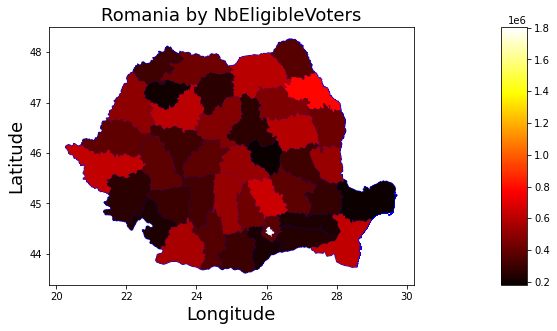

In [30]:
plot_counties_colored_by_value(gdf_counties_4, "NbEligibleVoters")

vmin=181419.0, vmax=786522.0


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


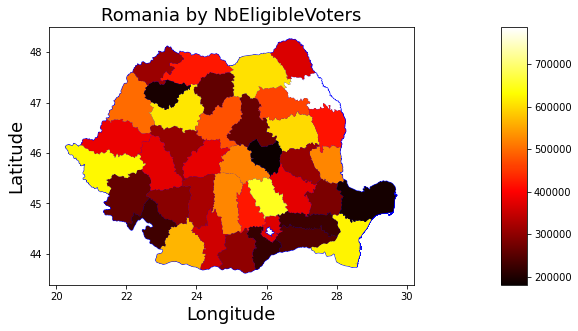

In [31]:
# Bucharest is too high relative to others, let's eliminate Bucharest
plot_counties_colored_by_value(gdf_counties_5, "NbEligibleVoters")

vmin=181419.0, vmax=786522.0


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


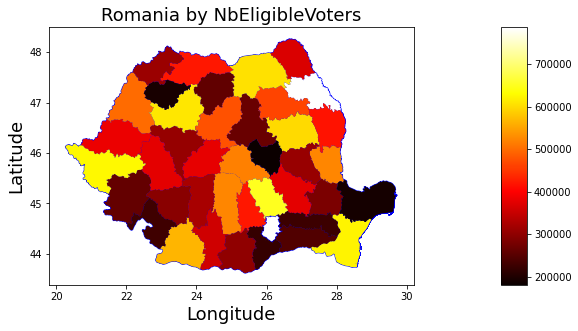

In [32]:
# eliminate Bucharest and Ilfov
plot_counties_colored_by_value(gdf_counties_6, "NbEligibleVoters")

vmin=22.642310860101187, vmax=7911.34649122807


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


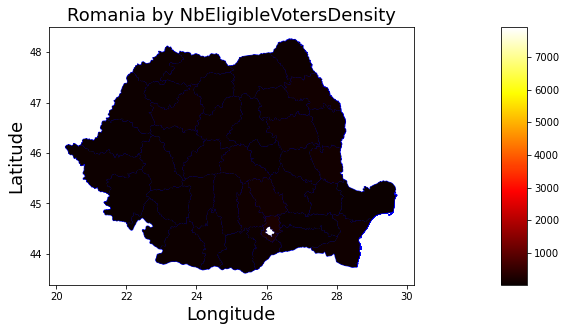

In [33]:
# density of voters per square kilometers
plot_counties_colored_by_value(gdf_counties_4, "NbEligibleVotersDensity")

vmin=22.642310860101187, vmax=235.30006317119393


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


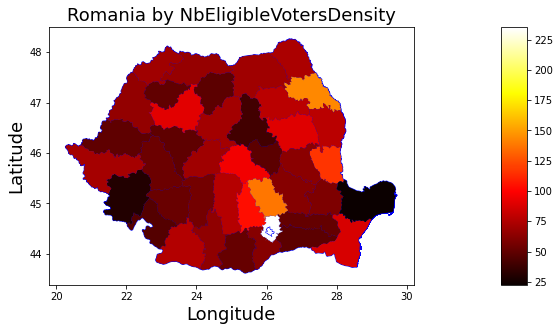

In [34]:
# eliminate Bucharest
plot_counties_colored_by_value(gdf_counties_5, "NbEligibleVotersDensity")

vmin=22.642310860101187, vmax=143.63075237399562


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


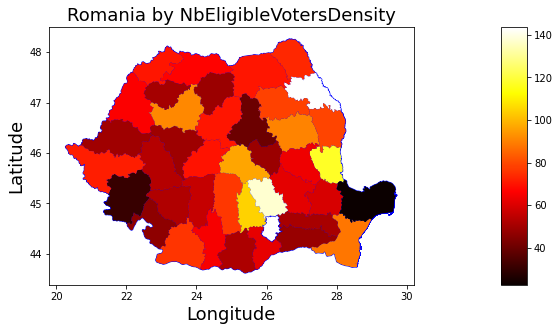

In [35]:
# eliminate Bucharest and Ilfov
plot_counties_colored_by_value(gdf_counties_6, "NbEligibleVotersDensity")

vmin=0.23550810898321065, vmax=0.4261679959510637


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


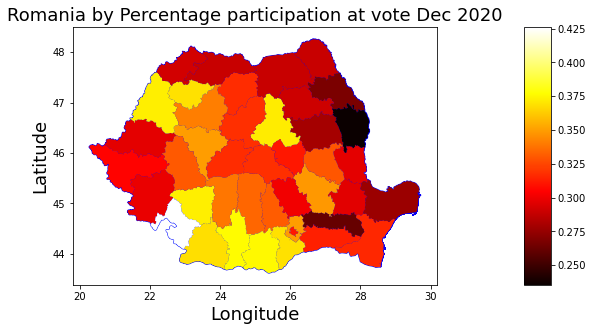

In [36]:
# finally, the percentage of the participation at the vote, inclusive in Bucharest
plot_counties_colored_by_value(gdf_counties_4, "Percentage participation at vote Dec 2020")

vmin=53265.0, vmax=562226.0


/Users/abuzatu/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


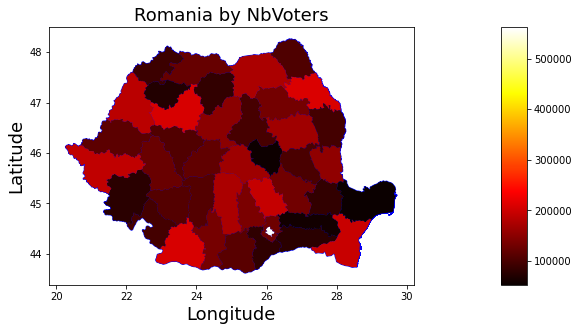

In [37]:
# let's plot also the total number of people that voted in each county
plot_counties_colored_by_value(gdf_counties_4, "NbVoters")

# Results of the elections

To come when the data becomes available.

In [168]:
df_result = pd.read_pickle(ELECTION_RESULTS_FILE_NAME)
df_result

,county,PSD,PNL,USRPLUS,AUR,UDMR,PMP,PROROMANIA
0,DD,3.50,25.00,29.00,25.00,NaN,8.30,NaN
1,B,26.30,21.50,29.30,4.91,NaN,5.64,NaN
2,AB,20.67,36.53,14.01,12.29,NaN,NaN,NaN
3,AR,22.38,27.18,14.45,13.69,6.060,4.38,3.94
4,AG,43.40,18.00,14.50,6.90,NaN,4.50,5.20
5,BC,27.28,22.87,22.91,9.57,NaN,4.74,4.98
6,BH,18.72,32.57,7.01,8.54,20.960,2.49,3.84
7,BN,27.59,31.11,7.02,8.15,NaN,10.91,NaN
8,BT,43.12,19.44,7.42,14.62,NaN,NaN,5.86
9,BV,20.56,25.62,26.79,7.66,4.950,NaN,NaN


Add a column with the name of the party that won the election in the county

In [169]:
def find_winner(row):
    # print(row)
    row2 = row.to_dict()
    # print(row2)
    winner = max(row2, key = row2.get)
    # print(winner)
    return winner

In [170]:
df_result["winner"] = df_result.set_index("county").apply(find_winner, axis = 1).values
df_result

,county,PSD,PNL,USRPLUS,AUR,UDMR,PMP,PROROMANIA,winner
0,DD,3.50,25.00,29.00,25.00,NaN,8.30,NaN,USRPLUS
1,B,26.30,21.50,29.30,4.91,NaN,5.64,NaN,USRPLUS
2,AB,20.67,36.53,14.01,12.29,NaN,NaN,NaN,PNL
3,AR,22.38,27.18,14.45,13.69,6.060,4.38,3.94,PNL
4,AG,43.40,18.00,14.50,6.90,NaN,4.50,5.20,PSD
5,BC,27.28,22.87,22.91,9.57,NaN,4.74,4.98,PSD
6,BH,18.72,32.57,7.01,8.54,20.960,2.49,3.84,PNL
7,BN,27.59,31.11,7.02,8.15,NaN,10.91,NaN,PNL
8,BT,43.12,19.44,7.42,14.62,NaN,NaN,5.86,PSD
9,BV,20.56,25.62,26.79,7.66,4.950,NaN,NaN,USRPLUS


In [171]:
# add the color of the winning party
dict_party_color = {
    "PSD" : "red",
    "PNL" : "blue",
    "USRPLUS" : "yellow",
    "AUR" : "goldenrod",
    "UDMR" : "darkgreen",
    "PMP" : "palegreen",
    "PROROMANIA": "tomato",   
}
df_result["color"] = df_result.winner.map(dict_party_color)
df_result

,county,PSD,PNL,USRPLUS,AUR,UDMR,PMP,PROROMANIA,winner,color
0,DD,3.50,25.00,29.00,25.00,NaN,8.30,NaN,USRPLUS,yellow
1,B,26.30,21.50,29.30,4.91,NaN,5.64,NaN,USRPLUS,yellow
2,AB,20.67,36.53,14.01,12.29,NaN,NaN,NaN,PNL,blue
3,AR,22.38,27.18,14.45,13.69,6.060,4.38,3.94,PNL,blue
4,AG,43.40,18.00,14.50,6.90,NaN,4.50,5.20,PSD,red
5,BC,27.28,22.87,22.91,9.57,NaN,4.74,4.98,PSD,red
6,BH,18.72,32.57,7.01,8.54,20.960,2.49,3.84,PNL,blue
7,BN,27.59,31.11,7.02,8.15,NaN,10.91,NaN,PNL,blue
8,BT,43.12,19.44,7.42,14.62,NaN,NaN,5.86,PSD,red
9,BV,20.56,25.62,26.79,7.66,4.950,NaN,NaN,USRPLUS,yellow


Combine the results with the gdf_counties_4

In [172]:
gdf_counties_4.shape

(42, 19)

In [173]:
gdf_counties_4

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,County,Administrative City,Area in thousand squared kilometers,County Abbreviation,CountyAbbreviation,NbEligibleVoters,NbVoters,Percentage participation at vote Dec 2020,NbEligibleVotersDensity
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622...",Alba,Alba Iulia,6.242,AB,AB,308520.0,107912.0,0.349773,49.426466
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837...",Arad,Arad,7.754,AR,AR,386478.0,115085.0,0.297779,49.842404
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049...",Argeș,Pitești,6.826,AG,AG,523258.0,174704.0,0.333877,76.656607
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098...",Bacău,Bacău,6.621,BC,BC,599086.0,167477.0,0.279554,90.482707
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918...",Bihor,Oradea,7.544,BH,BH,500328.0,186723.0,0.373201,66.321315
5,187,ROU,Romania,6,Bistrița-Năsăud,Judet,County,None,Bistrita-nasaud,"POLYGON ((24.39300 47.60473, 24.39624 47.60393...",Bistrița-Năsăud,Bistrița,5.355,BN,BN,261460.0,83128.0,0.317938,48.825397
6,187,ROU,Romania,7,Botoșani,Judet,County,None,Botosani,"POLYGON ((26.71876 48.24885, 26.71917 48.24854...",Botoșani,Botoșani,4.986,BT,BT,368240.0,106720.0,0.289811,73.854793
7,187,ROU,Romania,8,Brașov,Judet,County,None,Brasov,"POLYGON ((25.26764 46.18901, 25.27024 46.18874...",Brașov,Brașov,5.363,BV,BV,517915.0,165161.0,0.318896,96.571881
8,187,ROU,Romania,9,Brăila,Judet,County,None,Braila,"POLYGON ((27.57121 45.48816, 27.57225 45.48775...",Brăila,Brăila,4.766,BR,BR,284035.0,84326.0,0.296886,59.596097
9,187,ROU,Romania,10,București,Municipiu,Municipality,None,Bucuresti,"POLYGON ((26.03870 44.38544, 26.03649 44.38741...",București,București,0.228,B,B,1803787.0,562226.0,0.311692,7911.346491


In [174]:
gdf_counties_5 = gdf_counties_4.merge(df_result, left_on = "County Abbreviation", right_on = "county",)
gdf_counties_5

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,...,county,PSD,PNL,USRPLUS,AUR,UDMR,PMP,PROROMANIA,winner,color
0,187,ROU,Romania,1,Alba,Judet,County,None,None,"POLYGON ((22.81332 46.56851, 22.81302 46.56622...",...,AB,20.67,36.53,14.01,12.29,NaN,NaN,NaN,PNL,blue
1,187,ROU,Romania,2,Arad,Judet,County,None,None,"POLYGON ((21.90678 46.66893, 21.90734 46.66837...",...,AR,22.38,27.18,14.45,13.69,6.060,4.38,3.94,PNL,blue
2,187,ROU,Romania,3,Argeș,Judet,County,None,Arges,"POLYGON ((24.77382 45.61148, 24.77572 45.61049...",...,AG,43.40,18.00,14.50,6.90,NaN,4.50,5.20,PSD,red
3,187,ROU,Romania,4,Bacău,Judet,County,None,Bacau,"POLYGON ((26.90936 46.82119, 26.91127 46.82098...",...,BC,27.28,22.87,22.91,9.57,NaN,4.74,4.98,PSD,red
4,187,ROU,Romania,5,Bihor,Judet,County,None,None,"POLYGON ((22.18750 47.59959, 22.19328 47.59918...",...,BH,18.72,32.57,7.01,8.54,20.960,2.49,3.84,PNL,blue
5,187,ROU,Romania,6,Bistrița-Năsăud,Judet,County,None,Bistrita-nasaud,"POLYGON ((24.39300 47.60473, 24.39624 47.60393...",...,BN,27.59,31.11,7.02,8.15,NaN,10.91,NaN,PNL,blue
6,187,ROU,Romania,7,Botoșani,Judet,County,None,Botosani,"POLYGON ((26.71876 48.24885, 26.71917 48.24854...",...,BT,43.12,19.44,7.42,14.62,NaN,NaN,5.86,PSD,red
7,187,ROU,Romania,8,Brașov,Judet,County,None,Brasov,"POLYGON ((25.26764 46.18901, 25.27024 46.18874...",...,BV,20.56,25.62,26.79,7.66,4.950,NaN,NaN,USRPLUS,yellow
8,187,ROU,Romania,9,Brăila,Judet,County,None,Braila,"POLYGON ((27.57121 45.48816, 27.57225 45.48775...",...,BR,42.00,15.00,8.20,8.00,NaN,4.60,4.40,PSD,red
9,187,ROU,Romania,10,București,Municipiu,Municipality,None,Bucuresti,"POLYGON ((26.03870 44.38544, 26.03649 44.38741...",...,B,26.30,21.50,29.30,4.91,NaN,5.64,NaN,USRPLUS,yellow


Plot the counties but colored the color in the column color

In [175]:
gdf_counties_5 = gdf_counties_5[["county", "NAME_1", "winner", "color", "geometry"]]
gdf_counties_5

,county,NAME_1,winner,color,geometry
0,AB,Alba,PNL,blue,"POLYGON ((22.81332 46.56851, 22.81302 46.56622..."
1,AR,Arad,PNL,blue,"POLYGON ((21.90678 46.66893, 21.90734 46.66837..."
2,AG,Argeș,PSD,red,"POLYGON ((24.77382 45.61148, 24.77572 45.61049..."
3,BC,Bacău,PSD,red,"POLYGON ((26.90936 46.82119, 26.91127 46.82098..."
4,BH,Bihor,PNL,blue,"POLYGON ((22.18750 47.59959, 22.19328 47.59918..."
5,BN,Bistrița-Năsăud,PNL,blue,"POLYGON ((24.39300 47.60473, 24.39624 47.60393..."
6,BT,Botoșani,PSD,red,"POLYGON ((26.71876 48.24885, 26.71917 48.24854..."
7,BV,Brașov,USRPLUS,yellow,"POLYGON ((25.26764 46.18901, 25.27024 46.18874..."
8,BR,Brăila,PSD,red,"POLYGON ((27.57121 45.48816, 27.57225 45.48775..."
9,B,București,USRPLUS,yellow,"POLYGON ((26.03870 44.38544, 26.03649 44.38741..."


In [176]:
gdf_counties_5.shape

(42, 5)

<AxesSubplot:>

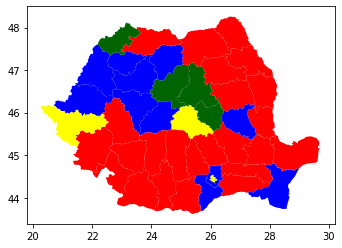

In [177]:
gdf_counties_5.plot(color = gdf_counties_5.color.values)

<AxesSubplot:>

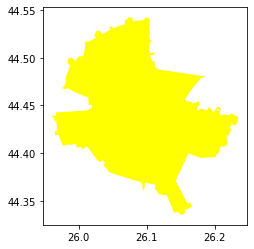

In [154]:
gdf_counties_5_2 = gdf_counties_5[gdf_counties_5.county == "B"]
gdf_counties_5_2.plot(color = gdf_counties_5_2.color.values)

In [341]:
def plot_counties_colored_by_column(gdf, var):
    gdf_2 = gdf[gdf.county == "B"]
    dynamic_linewidth = 0.4
    fig, ax = plt.subplots(1, 1, figsize = (12, 9))
    #
    for i, party in enumerate(dict_party_color.keys()):
        #if party != "PSD":
        #    continue
        #gdf_2.plot(ax = ax, label = f"bla", color = f"{dict_party_color[party]}", legend = True)
        plt.text(28.5, 48.2-i*0.3, party, color = dict_party_color[party], fontsize=13, weight = "bold",
                 bbox=dict(boxstyle="round", ec="grey", fc = matplotlib.colors.colorConverter.to_rgba("grey", alpha=0.5)),
                )
    # polygon_color_face = matplotlib.colors.colorConverter.to_rgba("cyan", alpha=1.0)
    polygon_color_edge = matplotlib.colors.colorConverter.to_rgba("black", alpha=1.0)
    gdf.plot(ax = ax, 
                  #facecolor=polygon_color_face,
                  edgecolor=polygon_color_edge,
                  linewidth = 1,
                  color = gdf[var].values,
                 )
    
    #
    plt.xlabel("Longitude", fontsize = 22)
    plt.ylabel("Latitude", fontsize = 22)
    plt.title(f"Counties in Romania by color of winning party", fontsize = 22)
    plt.savefig("")

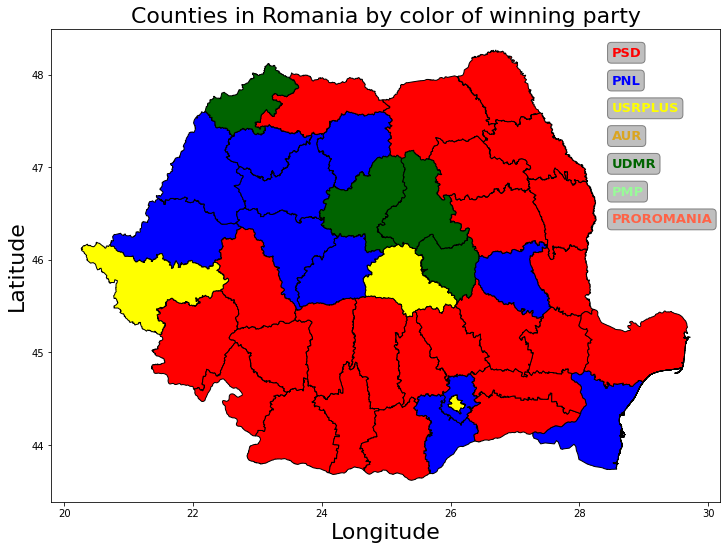

In [342]:
plot_counties_colored_by_column(gdf_counties_5, "color")